# 데이터 불러오기

In [2]:

import pandas as pd


In [3]:

iris = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/IRIS.csv")


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
## 타겟 변수의 구성을 살펴봅니다.
iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [6]:
## 아이디를 생성합니다.
iris['id'] = range(len(iris))

In [7]:
## 열의 순서를 바꿉니다.
iris = iris[['id','sepal_length','sepal_width','petal_length','petal_width','species']]

In [8]:
## iris 중에서 100개를 랜덤으로 추출해 train 데이터로 지정합니다.
train = iris.sample(100,replace=False,random_state=10).reset_index().drop(['index'],axis=1)

In [9]:
## 추출되지 않은 나머지를 test 데이터로 지정합니다.
test = iris.loc[ ~iris['id'].isin(train['id']) ]
test = test.reset_index().drop(['index'],axis=1)

# 의사결정나무 실습

<strong>특징</strong>

1. 해석이 쉽다.
2. 빠르다.

<strong>파라미터</strong>

1. min_samples_split : 의사결정나무에서 최종 노드의 최소 샘플 수

<strong>의사결정나무 학습시키기</strong>

In [10]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split = 10)

In [11]:
train_x = train[['sepal_length','sepal_width','petal_length','petal_width']]
train_y = train['species']
test_x = test[['sepal_length','sepal_width','petal_length','petal_width']]
test_y = test['species']

In [12]:
dt.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
predictions = dt.predict(test_x)

In [15]:
(pd.Series(predictions)==test_y).mean()

0.96

<strong>의사결정나무가 만든 규칙을 시각화하고 해석해보기</strong>

In [16]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10

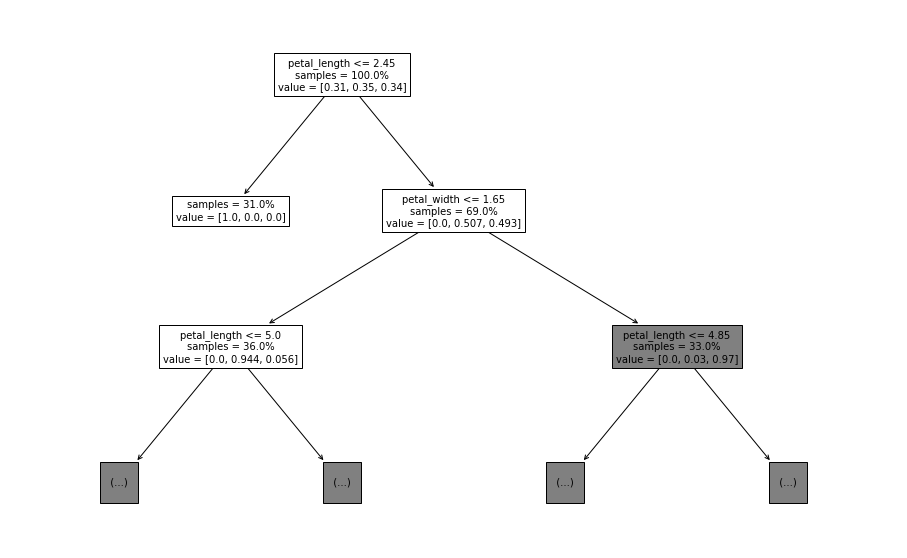

In [17]:
## 의사결정나무를 시각화합니다.
from sklearn import tree
import matplotlib.pyplot as plt

a=tree.plot_tree(dt,feature_names = ['sepal_length','sepal_width','petal_length','petal_width'],impurity=False, max_depth=2, fontsize=10, proportion=True)
plt.show(a)